## **AI Assignment 2.**

## **Building an ANN model for Drug classification.**

Name : Prateek Bajpai

Class : Data Science & Big Data Analytics

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense,BatchNormalization,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Loading the dataset

from google.colab import files
uploaded = files.upload()

Saving drug200.csv to drug200.csv


## **Reading the Dataset.**

In [6]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [13]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

<ipython-input-27-ba7d2a90dba2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Drug'], palette = "Set1")


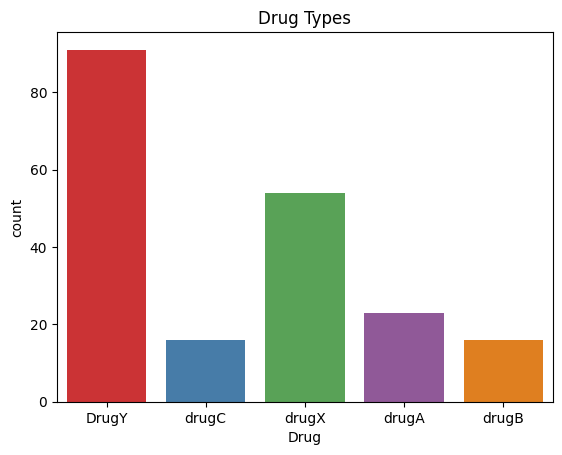

In [27]:
sns.countplot(x=df['Drug'], palette = "Set1")
plt.title('Drug Types');

## **Preprocessing.**

In [28]:
X=df.drop(columns='Drug')
y=df['Drug']

In [29]:
X=pd.get_dummies(X,dtype=float,drop_first=True)
X

,Age,Na_to_K,Sex_M,BP_LOW,BP_NORMAL,Cholesterol_NORMAL
0,23,25.355,0.0,0.0,0.0,0.0
1,47,13.093,1.0,1.0,0.0,0.0
2,47,10.114,1.0,1.0,0.0,0.0
3,28,7.798,0.0,0.0,1.0,0.0
4,61,18.043,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...
195,56,11.567,0.0,1.0,0.0,0.0
196,16,12.006,1.0,1.0,0.0,0.0
197,52,9.894,1.0,0.0,1.0,0.0
198,23,14.020,1.0,0.0,1.0,1.0


<ipython-input-30-3cd339c99e47>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


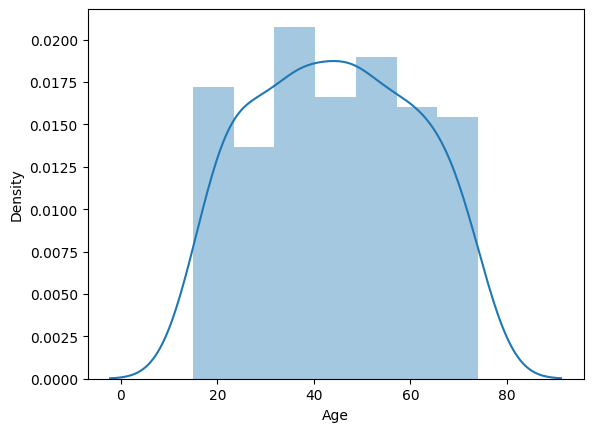

In [30]:
sns.distplot(df['Age']);

<ipython-input-31-bf7533b30019>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Na_to_K'])


<Axes: xlabel='Na_to_K', ylabel='Density'>

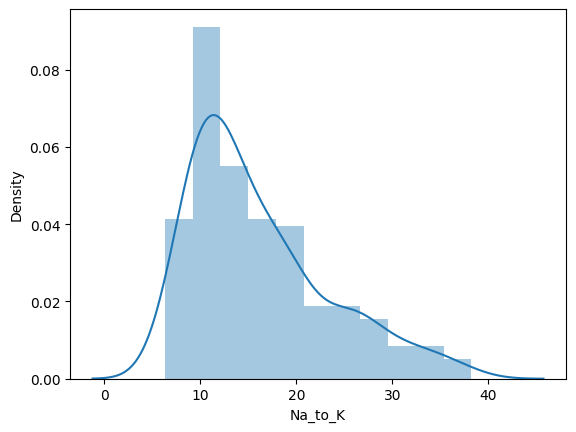

In [31]:
sns.distplot(df['Na_to_K'])

<ipython-input-32-2d15fd91a2c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df ,x= df['Sex'] , palette='rocket')


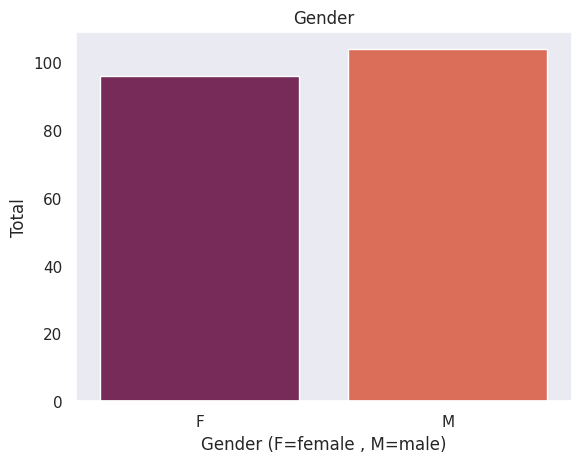

In [32]:
sns.set_theme(style="dark")
sns.countplot(data=df ,x= df['Sex'] , palette='rocket')
plt.xlabel('Gender (F=female , M=male)')
plt.ylabel('Total')
plt.title('Gender');

<ipython-input-33-f353d9e00834>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot( data=df, x=df['BP'], palette="rocket")


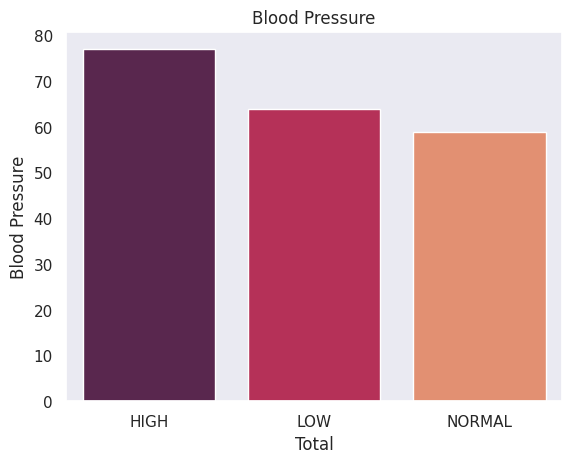

In [33]:
sns.countplot( data=df, x=df['BP'], palette="rocket")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.title('Blood Pressure');

## **Building ANN Model.**

In [41]:
from sklearn.preprocessing import StandardScaler

X = df.drop('Drug', axis=1).values
y = pd.get_dummies(df['Drug']).values  # One-hot encode the target variable

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
# Build the Neural Network Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')  # Output layer
])


In [46]:
# Compile the Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the Model
model.fit(X_train, y_train, batch_size=32, epochs=25, validation_split=0.1)

# Evaluate the Model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/25
5/5 [==============================] - 2s 101ms/step - loss: 0.2201 - accuracy: 0.9653 - val_loss: 0.1764 - val_accuracy: 0.9375
Epoch 2/25
5/5 [==============================] - 0s 22ms/step - loss: 0.1867 - accuracy: 0.9792 - val_loss: 0.1512 - val_accuracy: 1.0000
Epoch 3/25
5/5 [==============================] - 0s 22ms/step - loss: 0.1631 - accuracy: 0.9861 - val_loss: 0.1286 - val_accuracy: 0.9375
Epoch 4/25
5/5 [==============================] - 0s 28ms/step - loss: 0.1462 - accuracy: 0.9792 - val_loss: 0.1196 - val_accuracy: 0.9375
Epoch 5/25
5/5 [==============================] - 0s 21ms/step - loss: 0.1312 - accuracy: 0.9722 - val_loss: 0.1080 - val_accuracy: 0.9375
Epoch 6/25
5/5 [==============================] - 0s 22ms/step - loss: 0.1168 - accuracy: 0.9792 - val_loss: 0.0922 - val_accuracy: 0.9375
Epoch 7/25
5/5 [==============================] - 0s 20ms/step - loss: 0.1015 - accuracy: 0.9861 - val_loss: 0.0820 - val_accuracy: 0.9375
Epoch 8/25
5/5 [==========

## **Testing model with random data.**

In [45]:
# Generating random input data
num_samples = 5

# Generating random data of the same shape as input features
random_input = np.random.rand(num_samples, X_train.shape[1])

# Scaling the random input data
random_input_scaled = scaler.transform(random_input)

# Predicting using the trained model
predictions = model.predict(random_input_scaled)

# Decode one-hot encoded predictions to get the predicted drug
predicted_drugs = [np.argmax(pred) for pred in predictions]

# Mapping predicted drug index to actual drug name
drug_mapping = {0: 'drugA', 1: 'drugB', 2: 'drugC', 3: 'drugX', 4: 'drugY'}
predicted_drugs_names = [drug_mapping[pred] for pred in predicted_drugs]

# Displaying the random input and predicted drugs
print("Random Input Data:")
print(random_input)
print("\nPredicted Drugs:")
print(predicted_drugs_names)


1/1 [==============================] - 0s 82ms/step
Random Input Data:
[[0.75014702 0.21788608 0.2416202  0.57287512 0.84810747]
 [0.80696005 0.94628087 0.47614017 0.0406879  0.83551932]
 [0.85600118 0.01422557 0.86672845 0.98778917 0.19111268]
 [0.29004582 0.22753831 0.95762639 0.14957082 0.10376679]
 [0.85872801 0.38564201 0.41468926 0.84889413 0.65737201]]

Predicted Drugs:
['drugA', 'drugA', 'drugA', 'drugC', 'drugA']
